In [1]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Importing required libraries
import sys
from collections import deque
import cv2
from google.colab.patches import cv2_imshow

### **Question : Upload your executable code here to the following problem statement: We have an NxM grid there are two animals one is 'Horse' and another is 'Bishop' which has different moving abilities. A 'Horse' can move 2.5 steps and a 'Bishop' can move only diagonal but not horizontally or vertically. Some grids are marked as inactive. Return 1 position where these animals can meet at any point. In the following image 0,3 & 2,0 are represented as an inactive grid where none of the animals can visit and 'Bishop' is at 3,2 position and possible direction are represented as arrow and 'Horse' is available at 6,6 and possible direction where horse can move are represented as arrow and circles. One of the possible point where the Bishop and Horse can meet is 4,5 as represented by yellow color. You need to use your own data structure, data types and test cases as per the requirement.**

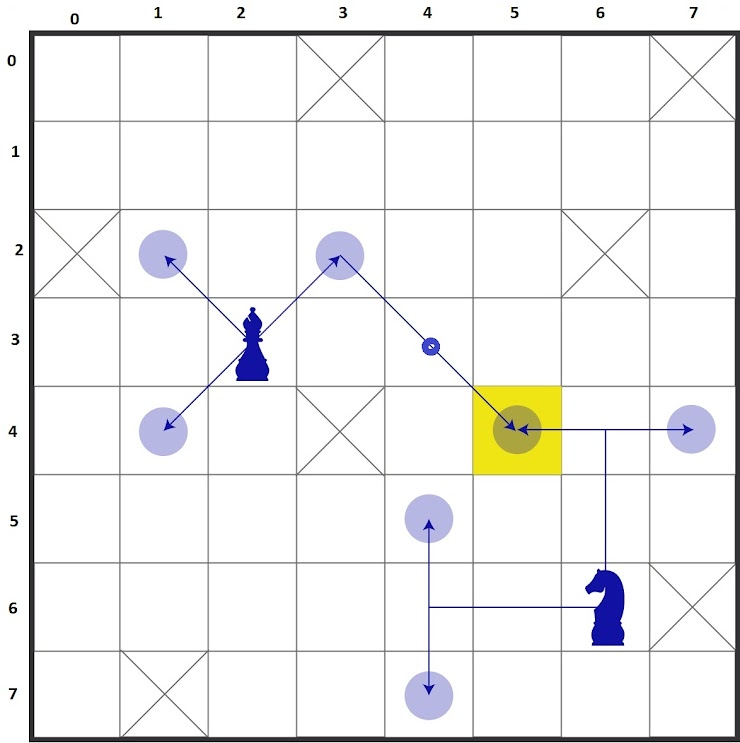

In [3]:
# Showing the question's image
image= cv2.imread('/content/gdrive/My Drive/Datasets/Sample images/Chess board.jpg')
cv2_imshow(image)

In [4]:
# For Bishop : checking minimum required number of steps to reach its destination
# Creating a class 'Graph'; x and y are chess board coordinates.
# 'distance' represents its minimum distance from the starting point
class Graph:
    def __init__(self, x, y, distance= 0):
        self.x = x
        self.y = y
        self.distance = distance
    def __hash__(self):
        return hash((self.x, self.y, self.distance))
    def __eq__(self, other):
        return (self.x, self.y, self.distance) == (other.x, other.y, other.distance)
# Below horizontal and vertical lists show all eight possible movements for the bishop
horizontal = [1, 1, -1, -1, 2, 2, -2, -2]
vertical =   [1, -1, 1, -1, 2, -2, 2, -2]
# Checking whether (x, y) are valid chess board coordinates or not. A Chess board is of N x N matrix. N is the one side length.
def valid_point(x, y, N):
    return not (x < 0 or y < 0 or x >= N or y >= N)
# Defining a function bfs to find minimum number of steps taken to travel from starting point to the destination
def bfs(starting, destination, N):
    visited_point = set()
    # Creating an instance of deque
    que = deque()
    que.append(starting)
    while que:
        node = que.popleft()
        x = node.x
        y = node.y
        distance = node.distance
        if x == destination.x and y == destination.y:
            return distance
        if node not in visited_point:
            visited_point.add(node)
# Checking for all eight possible movements and enqueuing each valid movement
            for i in range(len(horizontal)):
                x1 = x + horizontal[i]
                y1 = y + vertical[i]
                if valid_point(x1, y1, N):
                    que.append(Graph(x1, y1, distance + 1))
    return sys.maxsize
if __name__ == '__main__':
    N = 8                
    starting = Graph(2, 3)   
    destination = Graph(5, 4) 
    print("Minimum number of steps required by the Bishop to travel from its starting point to the meeting point is :", bfs(starting, destination, N) )

Minimum number of steps required by the Bishop to travel from its starting point to the meeting point is : 2


In [5]:
# For Horse : checking minimum required number of steps to reach its destination
# Creating a class 'Graph', x and y are chess board coordinates.
# 'distance' represents its minimum distance from the starting point
class Graph:
    def __init__(self, x, y, distance= 0):
        self.x = x
        self.y = y
        self.distance = distance
    def __hash__(self):
        return hash((self.x, self.y, self.distance))
    def __eq__(self, other):
        return (self.x, self.y, self.distance) == (other.x, other.y, other.distance)
# Below horizontal and vertical lists shows all eight possible movements for the horse
horizontal = [2, 2, -2, -2, 1, 1, -1, -1]
vertical =   [-1, 1, 1, -1, 2, -2, 2, -2]
# Checking whether (x, y) are valid chess board coordinates or not. A Chess board is of N x N matrix. N is the one side length.
def valid_point(x, y, N):
    return not (x < 0 or y < 0 or x >= N or y >= N)
# Defining a function bfs to find minimum number of steps taken to travel from starting point to the destination.
def bfs(starting, destination, N):
    visited_point = set()
    # Creating an instance of deque
    que = deque()
    que.append(starting)
    while que:
        node = que.popleft()
        x = node.x
        y = node.y
        distance = node.distance
        if x == destination.x and y == destination.y:
            return distance
        if node not in visited_point:
            visited_point.add(node)
# Checking for all eight possible movements and enqueuing each valid movement
            for i in range(len(horizontal)):
                x1 = x + horizontal[i]
                y1 = y + vertical[i]
                if valid_point(x1, y1, N):
                    que.append(Graph(x1, y1, distance + 1))
    return sys.maxsize
if __name__ == '__main__':
    N = 8                
    starting = Graph(6, 6)   
    destination = Graph(5, 4) 
    print("Minimum number of steps required by the Horse to travel from its starting point to the meeting point is :", bfs(starting, destination, N) )

Minimum number of steps required by the Horse to travel from its starting point to the meeting point is : 1


Explanation of this Breadth-first search Graph algorithm :

( I have used the (x, y) coordinates with respect to the image given in the question)

1. First Bishop moves, its starting point is (2, 3). In the first move, it goes to  (3, 2). 
2. Then Horse moves. Its starting point is (6, 6). In the first move, it reaches the required meeting point which is (5, 4). 
3. Then in second move of bishop, it also reaches the meeting point (5, 4). Hence, both Bishop and Horse meets. 